In [175]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [331]:
def make_empty_array(num,Ks,ms,length):
    EMPTY = []
    for i in np.arange(num):
        EMPTY.append(np.nan*np.zeros((length,101,101)))
    return EMPTY

In [462]:
R_KC = np.load('Simul/R_Kc.npz',allow_pickle=True)
K_cs = R_KC['Kcs']
m_Kc = R_KC['ms']
K_mins = R_KC['K_mins']

In [335]:
Ks = np.linspace(0,10,101)
ms = np.linspace(0,10,101)
Rs,R0s,RPs,RMs,RPLs,RMLs,Rstds,N0s,NMs,NPs = make_empty_array(10,Ks,ms,10)
KK,MM = np.meshgrid(Ks,ms)

for i in range(10):
    print(i+1)
    A = np.load(f'RS_{i+1}.npz')
    Rs[i] = A['N_Rs'].T
    R0s[i] = A['N_R0s'].T
    RPs[i] = A['N_RPs'].T
    RMs[i] = A['N_RMs'].T
    RPLs[i] = A['N_RPLs'].T
    RMLs[i] = A['N_RMLs'].T
    RTSs[i] = A['N_rstd'].T
    N0s[i] = A['N_0s'].T
    NMs[i] = A['N_Ms'].T
    NPs[i] = A['N_Ps'].T

1
2
3
4
5
6
7
8
9
10


In [474]:
mcs_rp0 = np.load('Simul/mcs_rp0.npz',allow_pickle=True)
mcs_rpdh = np.load('Simul/mcs_rpdh.npz',allow_pickle=True)

ms_rp0=mcs_rp0['ms']
K_rp0u=mcs_rp0['K_u']
K_rp0d=mcs_rp0['K_d']

ms_rpdh=mcs_rpdh['ms']
K_rpdhu=mcs_rpdh['K_u']
K_rpdhd=mcs_rpdh['K_d']

In [30]:
M_Rs = np.mean(Rs,axis=0)
M_RPLs = np.mean(RPLs,axis=0)

In [466]:
RPLs_new = np.where((NPs>50)&(N0s>1000),RPLs,np.nan)
RMLs_new = np.where((NMs>50)&(N0s>1000),RMLs,np.nan)
R0s_new = np.where((N0s>1000),R0s,np.nan)

RPs_new = np.where((NPs>50)&(N0s>1000),RPs,np.nan)
RMs_new = np.where((NMs>50)&(N0s>1000),RMs,np.nan)

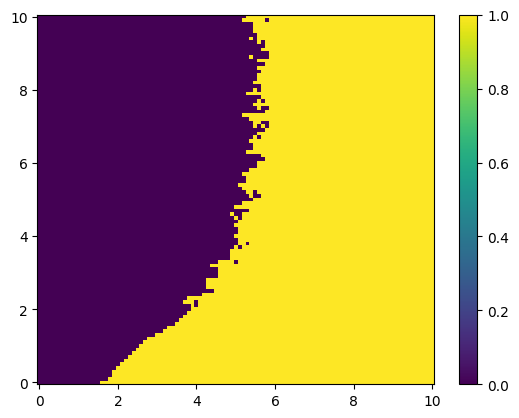

In [144]:
plt.pcolormesh(Ks,ms,N0s[1]>700)
plt.colorbar()

In [468]:
M_RPLs = np.nanmean(RPLs_new,axis=0)
M_RMLs = np.nanmean(RMLs_new,axis=0)
M_RPs = np.nanmean(RPs_new,axis=0)
M_RMs = np.nanmean(RMs_new,axis=0)

M_R0s = np.nanmean(R0s_new,axis=0)

C:\Users\kim9y\AppData\Local\Temp\ipykernel_1612\521090883.py:1: RuntimeWarning: Mean of empty slice
  M_RPLs = np.nanmean(RPLs_new,axis=0)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_1612\521090883.py:2: RuntimeWarning: Mean of empty slice
  M_RMLs = np.nanmean(RMLs_new,axis=0)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_1612\521090883.py:3: RuntimeWarning: Mean of empty slice
  M_RPs = np.nanmean(RPs_new,axis=0)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_1612\521090883.py:4: RuntimeWarning: Mean of empty slice
  M_RMs = np.nanmean(RMs_new,axis=0)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_1612\521090883.py:6: RuntimeWarning: Mean of empty slice
  M_R0s = np.nanmean(R0s_new,axis=0)


C:\Users\kim9y\AppData\Local\Temp\ipykernel_1612\2307226496.py:3: RuntimeWarning: Mean of empty slice
  plt.pcolormesh(Ks,ms,np.nanmean(R0s_new,axis=0))
C:\Users\kim9y\AppData\Local\Temp\ipykernel_1612\2307226496.py:11: RuntimeWarning: Mean of empty slice
  plt.pcolormesh(Ks,ms,np.nanmean(RPLs_new,axis=0))
C:\Users\kim9y\AppData\Local\Temp\ipykernel_1612\2307226496.py:24: RuntimeWarning: Mean of empty slice
  plt.pcolormesh(Ks,ms,np.nanmean(RMLs_new,axis=0))


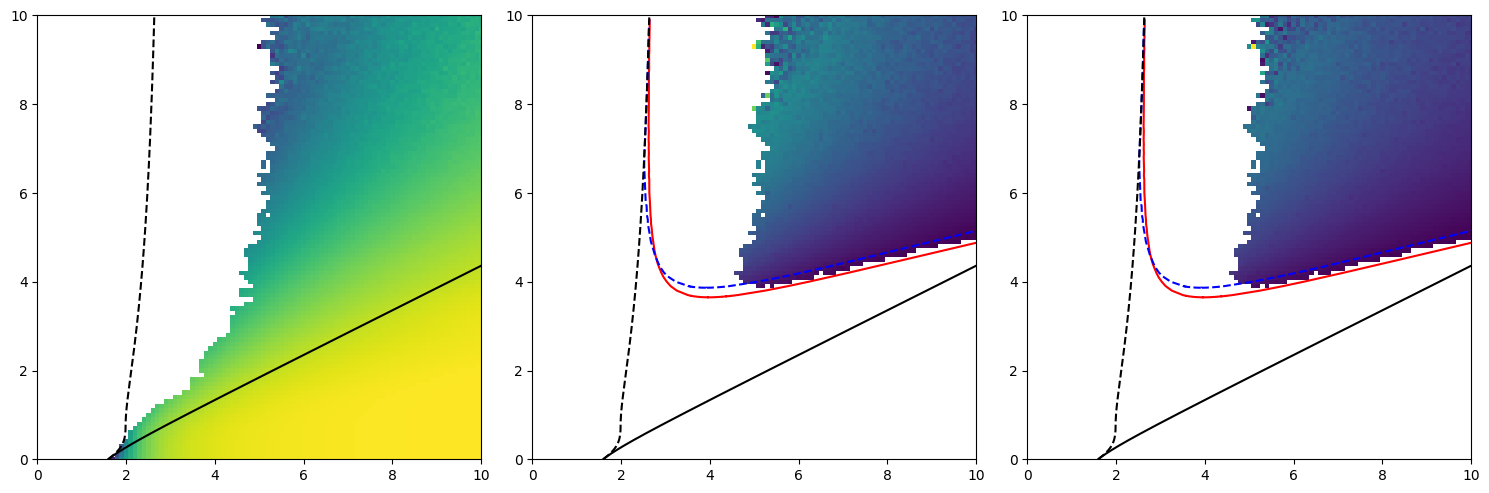

In [475]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.pcolormesh(Ks,ms,np.nanmean(R0s_new,axis=0))
plt.gca().set_aspect(1)
plt.xlim(0,10)
plt.ylim(0,10)
plt.plot(K_cs, m_Kc, 'k-')
plt.plot(K_mins, m_Kc, 'k--')

plt.subplot(132)
plt.pcolormesh(Ks,ms,np.nanmean(RPLs_new,axis=0))
plt.gca().set_aspect(1)
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}=0^+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}=R^{drift}/2$')
plt.plot(K_rpdhu,ms_rpdh,'b--')

plt.xlim(0,10)
plt.ylim(0,10)
plt.plot(K_cs, m_Kc, 'k-')
plt.plot(K_mins, m_Kc, 'k--')
plt.subplot(133)
plt.pcolormesh(Ks,ms,np.nanmean(RMLs_new,axis=0))
plt.gca().set_aspect(1)
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}=0^+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}=R^{drift}/2$')
plt.plot(K_rpdhu,ms_rpdh,'b--')
plt.xlim(0,10)
plt.ylim(0,10)
plt.tight_layout()
plt.plot(K_cs, m_Kc, 'k-')
plt.plot(K_mins, m_Kc, 'k--')

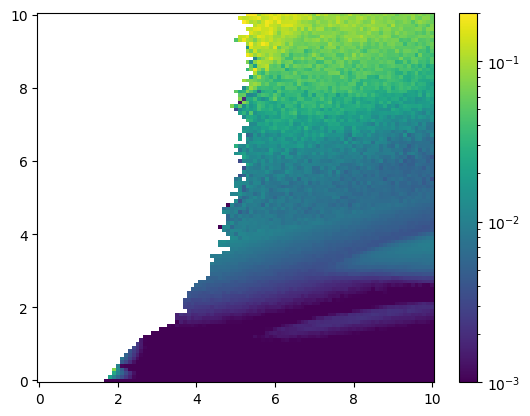

In [215]:
plt.pcolormesh(Ks,ms,np.abs(M_R0s-DATA['R0']),norm=mcolors.LogNorm(vmin=1e-3,vmax=2e-1))
plt.colorbar()

In [ ]:
Rthr = DATA['R0'] + 2*DATA['RP']

(0.0, 2.0)

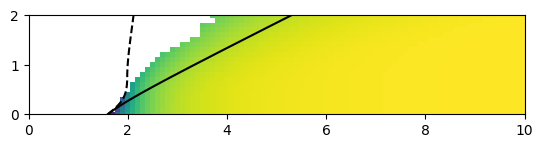

In [470]:
plt.pcolormesh(Ks,ms,M_R0s)
plt.plot(K_cs, m_Kc, 'k-')
plt.plot(K_mins, m_Kc, 'k--')
plt.xlim(0,10)
plt.ylim(0,10)
plt.gca().set_aspect(1)
plt.ylim(0,2)

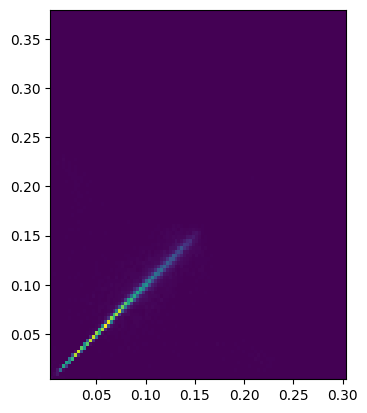

In [163]:
cond = (np.isnan(RPLs_new))|(np.isnan(RMLs_new))
plt.hist2d(RPLs_new[~cond],RMLs_new[~cond],bins=100)
plt.gca().set_aspect(1)
# plt.plot([0,1],[0,1])

C:\Users\kim9y\AppData\Local\Temp\ipykernel_1612\1995722096.py:1: RuntimeWarning: Mean of empty slice
  plt.pcolormesh(KK,MM,np.abs(np.nanmean(RPLs_new - DATA['RPl'],axis=0)),norm=mcolors.LogNorm(vmin=1e-3,vmax=1e-1),cmap='tab20c')


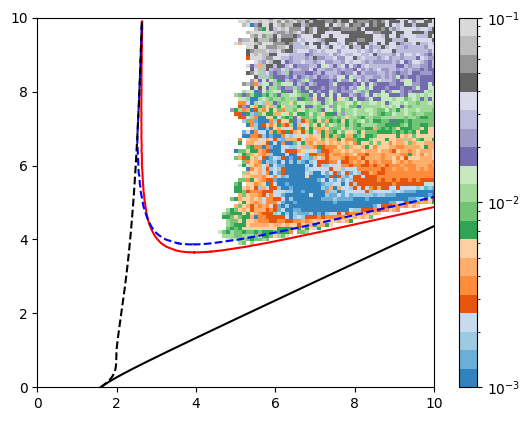

In [478]:
plt.pcolormesh(KK,MM,np.abs(np.nanmean(RPLs_new - DATA['RPl'],axis=0)),norm=mcolors.LogNorm(vmin=1e-3,vmax=1e-1),cmap='tab20c')
plt.colorbar()
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}=0^+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}=R^{drift}/2$')
plt.plot(K_rpdhu,ms_rpdh,'b--')
plt.xlim(0,10)
plt.ylim(0,10)
plt.plot(K_cs, m_Kc, 'k-')
plt.plot(K_mins, m_Kc, 'k--')

C:\Users\kim9y\AppData\Local\Temp\ipykernel_1612\4208262947.py:1: RuntimeWarning: Mean of empty slice
  plt.pcolormesh(KK,MM,np.abs(np.nanmean(RPLs_new - DATA['RPl'],axis=0)),norm=mcolors.LogNorm(vmin=5e-3,vmax=2e-1),cmap='inferno')


(0.0, 10.0)

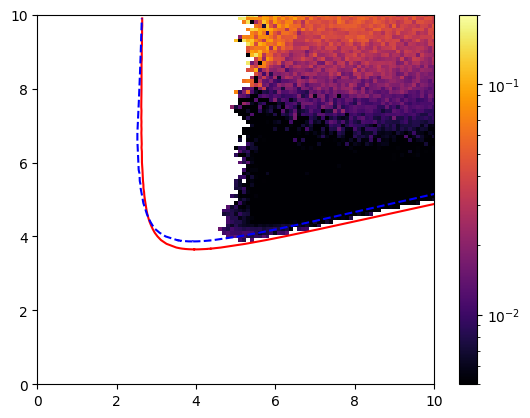

In [479]:
plt.pcolormesh(KK,MM,np.abs(np.nanmean(RPLs_new - DATA['RPl'],axis=0)),norm=mcolors.LogNorm(vmin=5e-3,vmax=2e-1),cmap='inferno')
plt.colorbar()
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}=0^+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}=R^{drift}/2$')
plt.plot(K_rpdhu,ms_rpdh,'b--')
plt.xlim(0,10)
plt.ylim(0,10)

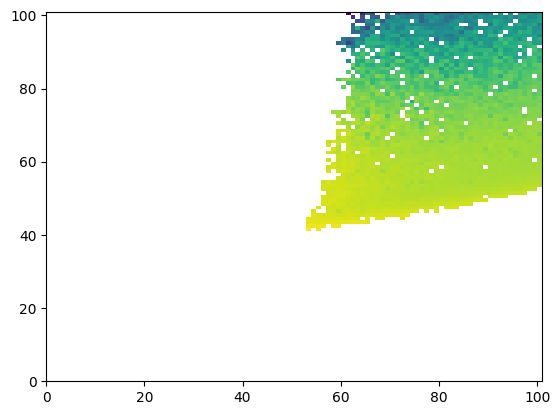

In [168]:
plt.pcolormesh(np.mean(RPLs_new - DATA['RP'],axis=0))

In [164]:
DATA = np.load('Simul/RR_RP.npz')

In [ ]:
RP_T = np.where(~np.isnan(RP),RP,0)
Rthr = R0 + 2*RP_T
Rsim = NR0 + np.where(~np.isnan(NRP),NRP,0) + np.where(~np.isnan(NRM),NRM,0)
plt.figure(dpi=500)
plt.scatter(Rthr,Rsim,s=1,c=MM,alpha=0.7,cmap='tab20b')
l = (0.775,0.93)
l = (0.0,1)
rho = nan_corrcoef(Rthr,Rsim)
plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
plt.text(0.05,0.98,fr'$\rho = {rho:.3f}$',transform=plt.gca().transAxes,fontsize=10,ha='left',va='top')
plt.xlim(0.4,1)
plt.ylim(0.4,1)
# plt.xlim(0.775,0.93)
# plt.ylim(0.775,0.93)
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$R^{(sim)}$',fontsize=15)
plt.xlabel(r'$R^{(thr)}$',fontsize=15)
plt.colorbar(label='m',orientation='horizontal',shrink=0.55)
plt.grid()



In [237]:
Rthr = DATA['R0'] + 2*DATA['RP']

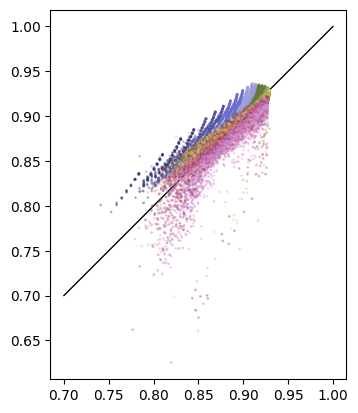

In [349]:
Rsims = []
Rthrs = []
MMs = []
KKs = []
for i in range(10):
    Rsim = R0s[i,:,:]+RPs[i,:,:]+RMs[i,:,:]
    Rsim = np.where(Rsim>0.1,Rsim,np.nan)
    Rsims.append(Rsim)
    Rthrs.append(Rthr)
    MMs.append(MM)
    KKs.append(KK)
    plt.scatter(Rthr,Rsim,s=1,c=MM,alpha=0.3,cmap='tab20b')
l = (0.7,1)
plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
Rsims = np.array(Rsims)
Rthrs = np.array(Rthrs)
MMs = np.array(MMs)
KKs = np.array(KKs)

(0.0, 0.3183460535494464)

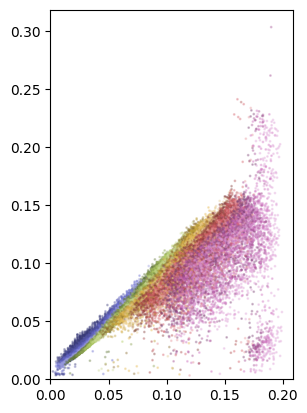

In [266]:
RPL_thrs = []
RPL_sims = []
for i in range(10):
    RPL_thrs.append(DATA['RPl'][:,:])
    RPL_sims.append(RPLs_new[i,:,:])
    plt.scatter(DATA['RPl'][:,:],RPLs_new[i,:,:],s=1,c=MM,alpha=0.3,cmap='tab20b')
# l = (0.7,1)
# plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
RPL_sims = np.array(RPL_sims)
RPL_thrs = np.array(RPL_thrs)
plt.xlim(0,)
plt.ylim(0,)


(0.0, 0.39827253951795416)

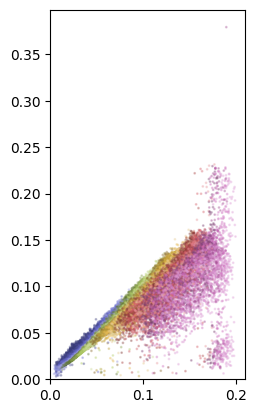

In [444]:
RML_thrs = []
RML_sims = []
for i in range(10):
    RML_thrs.append(DATA['RPl'][:,:])
    RML_sims.append(RMLs_new[i,:,:])
    plt.scatter(DATA['RPl'][:,:],RMLs_new[i,:,:],s=1,c=MM,alpha=0.3,cmap='tab20b')
# l = (0.7,1)
# plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
RML_sims = np.array(RML_sims)
RML_thrs = np.array(RML_thrs)
plt.xlim(0,)
plt.ylim(0,)


In [282]:
from ipywidgets import interactive
import ipywidgets as widgets

def plot_hist(m_idx):
    plt.clf()
    conds = np.isnan(RPL_sims[:,m_idx,:].flatten())|np.isnan(RPL_thrs[:,m_idx,:].flatten())
    plt.hist2d(RPL_thrs[:,m_idx,:].flatten()[~conds],RPL_sims[:,m_idx,:].flatten()[~conds],bins=100);
    ax =plt.gca()
    ax.set_aspect('equal', adjustable='box')
    print(ax.get_xlim())
    plt.plot(ax.get_xlim(),ax.get_xlim(),c='w',lw=1,zorder=10)
    plt.title(f'm = {ms[m_idx]:.1f}')

interactive_plot = interactive(plot_hist, m_idx=widgets.IntSlider(min=38, max=100, step=1, value=50))
display(interactive_plot)
# plt.hist(np.r_[(RPLs_new - DATA['RPl'])[:,m_idx,:].flatten(),(RMLs_new - DATA['RPl'])[:,m_idx,:].flatten()],bins=100);

interactive(children=(IntSlider(value=50, description='m_idx', min=38), Output()), _dom_classes=('widget-inter…

In [284]:
from ipywidgets import interactive
import ipywidgets as widgets

def plot_hist(K_idx):
    plt.clf()
    conds = np.isnan(RPL_sims[:,:,K_idx].flatten())|np.isnan(RPL_thrs[:,:,K_idx].flatten())
    plt.hist2d(RPL_thrs[:,:,K_idx].flatten()[~conds],RPL_sims[:,:,K_idx].flatten()[~conds],bins=100);
    ax =plt.gca()
    ax.set_aspect('equal', adjustable='box')
    print(ax.get_xlim())
    plt.plot(ax.get_xlim(),ax.get_xlim(),c='w',lw=1,zorder=10)
    plt.title(f'K = {Ks[K_idx]:.1f}')

interactive_plot = interactive(plot_hist, K_idx=widgets.IntSlider(min=38, max=100, step=1, value=50))
display(interactive_plot)
# plt.hist(np.r_[(RPLs_new - DATA['RPl'])[:,K_idx,:].flatten(),(RMLs_new - DATA['RPl'])[:,K_idx,:].flatten()],bins=100);

interactive(children=(IntSlider(value=50, description='K_idx', min=38), Output()), _dom_classes=('widget-inter…

(0.03412008811926338, 0.11343389496850163)

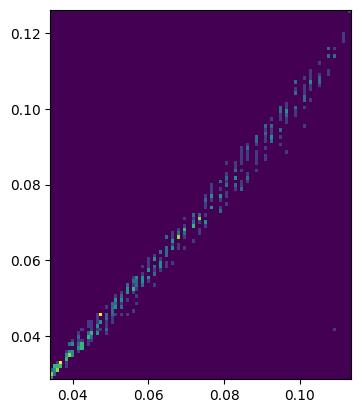

In [ ]:

conds = np.isnan(RPL_sims[:,60,:].flatten())|np.isnan(RPL_thrs[:,60,:].flatten())
plt.hist2d(RPL_thrs[:,60,:].flatten()[~conds],RPL_sims[:,60,:].flatten()[~conds],bins=100);
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim()
# plt.ylim(plt.gca().get_xlim())
# plt.plot(plt.gca().get_xlim(),plt.gca().get_xlim())

In [400]:
10 - 3.9

6.1

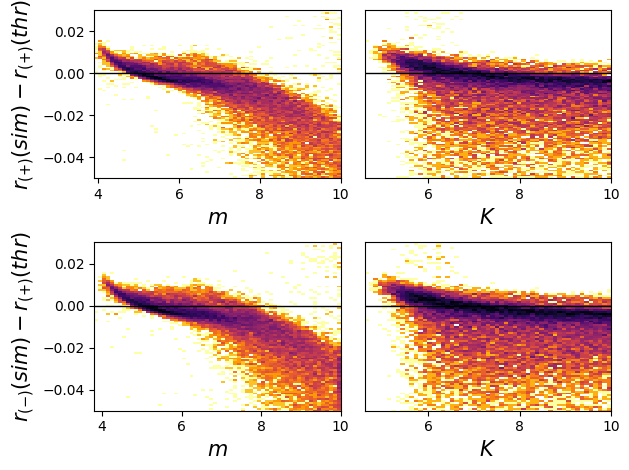

In [450]:
conds = np.isnan(RPL_sims.flatten())|np.isnan(RPL_thrs.flatten())
ax1 = plt.subplot(221)
plt.hist2d(MMs.flatten()[~conds],RPL_sims.flatten()[~conds] - RPL_thrs.flatten()[~conds],bins=(62,400),cmap='inferno_r',norm=mcolors.LogNorm());
plt.axhline(0,c='k',lw=1,zorder=10)
plt.ylim(-0.05,0.03)

plt.plot(plt.gca().get_xlim(),plt.gca().get_xlim())
plt.xlabel(rf'$m$',fontsize=15)
plt.ylabel(r'$r_{(+)}{(sim)}-r_{(+)}{(thr)}$',fontsize=15)


ax2 = plt.subplot(222)
plt.hist2d(KKs.flatten()[~conds],RPL_sims.flatten()[~conds] - RPL_thrs.flatten()[~conds],bins=(55,400),cmap='inferno_r',norm=mcolors.LogNorm());
plt.axhline(0,c='k',lw=1,zorder=10)
plt.ylim(-0.05,0.03)
plt.yticks([])
plt.plot(plt.gca().get_xlim(),plt.gca().get_xlim())
plt.xlabel(rf'$K$',fontsize=15)
plt.gca().get_xlim()


conds = np.isnan(RML_sims.flatten())|np.isnan(RML_thrs.flatten())
ax3 = plt.subplot(223)
plt.hist2d(MMs.flatten()[~conds],RML_sims.flatten()[~conds] - RML_thrs.flatten()[~conds],bins=(62,400),cmap='inferno_r',norm=mcolors.LogNorm());
plt.axhline(0,c='k',lw=1,zorder=10)
plt.ylim(-0.05,0.03)

plt.plot(plt.gca().get_xlim(),plt.gca().get_xlim())
plt.xlabel(rf'$m$',fontsize=15)
plt.ylabel(r'$r_{(-)}{(sim)}-r_{(+)}{(thr)}$',fontsize=15)


ax4 = plt.subplot(224)
plt.hist2d(KKs.flatten()[~conds],RML_sims.flatten()[~conds] - RML_thrs.flatten()[~conds],bins=(55,400),cmap='inferno_r',norm=mcolors.LogNorm());
plt.axhline(0,c='k',lw=1,zorder=10)
plt.ylim(-0.05,0.03)
plt.yticks([])
plt.plot(plt.gca().get_xlim(),plt.gca().get_xlim())
plt.xlabel(rf'$K$',fontsize=15)
plt.gca().get_xlim()

plt.tight_layout()

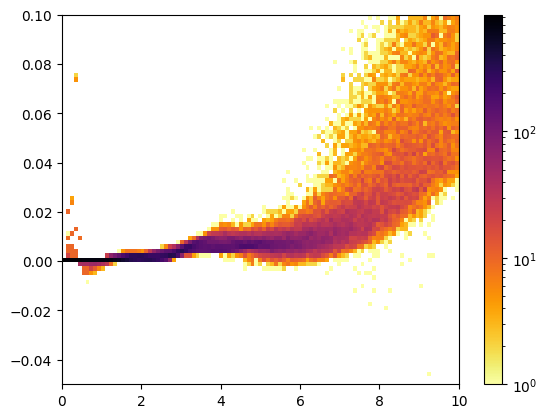

In [379]:
conds = np.isnan(R0_sims.flatten())|np.isnan(R0_thrs.flatten())
plt.hist2d(MMs.flatten()[~conds],R0_sims.flatten()[~conds] - R0_thrs.flatten()[~conds],bins=(101,200),cmap='inferno_r',norm=mcolors.LogNorm());
# plt.gca().set_aspect('equal', adjustable='box')
# plt.xlim()
# plt.axhline(0,c='w',lw=1,zorder=10)
# plt.ylim(plt.gca().get_xlim())
plt.ylim(-0.05,0.1)
# plt.plot(plt.gca().get_xlim(),plt.gca().get_xlim())
plt.colorbar()

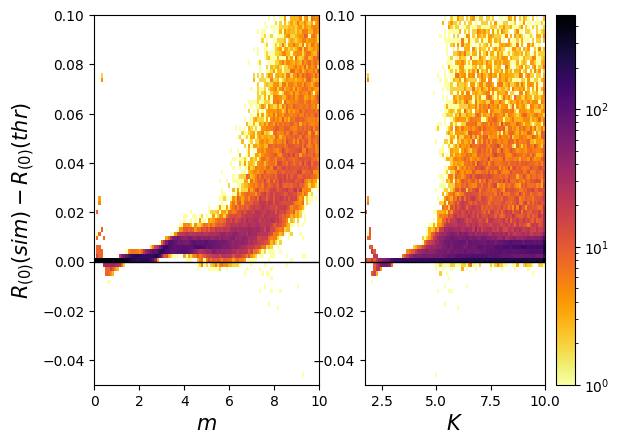

In [442]:
conds = np.isnan(R0_sims.flatten())|np.isnan(R0_thrs.flatten())
plt.subplot(121)
plt.hist2d(MMs.flatten()[~conds],R0_sims.flatten()[~conds] - R0_thrs.flatten()[~conds],bins=(101,200),cmap='inferno_r',norm=mcolors.LogNorm());
plt.xlabel(rf'$m$',fontsize=15)
plt.ylabel(r'$R_{(0)}{(sim)}-R_{(0)}{(thr)}$',fontsize=15)
plt.axhline(0,c='k',lw=1,zorder=10)
plt.ylim(-0.05,0.1)
plt.subplot(122)
plt.hist2d(KKs.flatten()[~conds],R0_sims.flatten()[~conds] - R0_thrs.flatten()[~conds],bins=(82,200),cmap='inferno_r',norm=mcolors.LogNorm());
plt.xlabel(rf'$K$',fontsize=15)
plt.axhline(0,c='k',lw=1,zorder=10)

plt.ylim(-0.05,0.1)

# plt.ylim(-0.01,0.01)
# plt.plot(plt.gca().get_xlim(),plt.gca().get_xlim())
plt.colorbar()

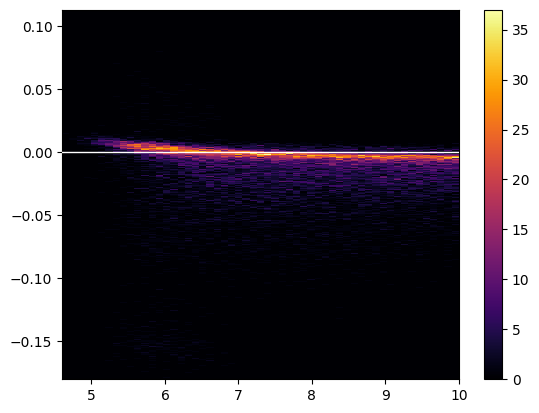

In [358]:
conds = np.isnan(RPL_sims.flatten())|np.isnan(RPL_thrs.flatten())
plt.hist2d(KKs.flatten()[~conds],RPL_sims.flatten()[~conds] - RPL_thrs.flatten()[~conds],bins=(55,500),cmap='inferno');
# plt.gca().set_aspect('equal', adjustable='box')
# plt.xlim()
plt.axhline(0,c='w',lw=1,zorder=10)
# plt.ylim(plt.gca().get_xlim())
# plt.ylim(-0.01,0.01)
plt.plot(plt.gca().get_xlim(),plt.gca().get_xlim())
plt.colorbar()

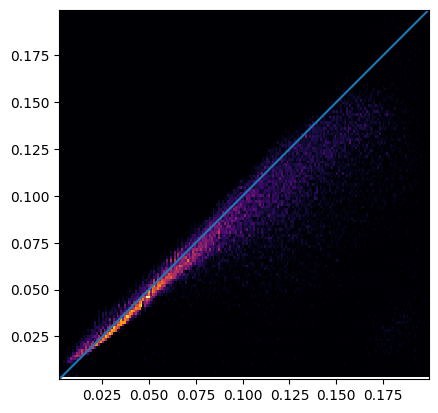

In [ ]:
conds = np.isnan(RPL_sims.flatten())|np.isnan(RPL_thrs.flatten())
plt.hist2d(RPL_thrs.flatten()[~conds],RPL_sims.flatten()[~conds],bins=200,cmap='inferno');
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim()
plt.ylim(plt.gca().get_xlim())
plt.plot(plt.gca().get_xlim(),plt.gca().get_xlim())

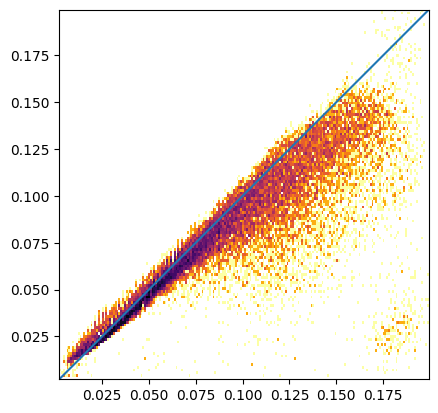

In [328]:
conds = np.isnan(RPL_sims.flatten())|np.isnan(RPL_thrs.flatten())
plt.hist2d(RPL_thrs.flatten()[~conds],RPL_sims.flatten()[~conds],bins=200,cmap='inferno_r',norm=mcolors.LogNorm());
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim()
plt.ylim(plt.gca().get_xlim())
plt.plot(plt.gca().get_xlim(),plt.gca().get_xlim())

(0.0, 0.3183460535494464)

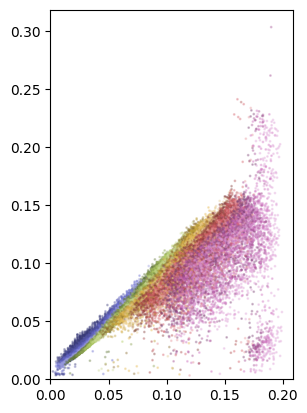

In [315]:
RPL_thrs = []
RPL_sims = []
for i in range(10):
    RPL_thrs.append(DATA['RPl'][:,:])
    RPL_sims.append(RPLs_new[i,:,:])
    plt.scatter(DATA['RPl'][:,:],RPLs_new[i,:,:],s=1,c=MM,alpha=0.3,cmap='tab20b')
# l = (0.7,1)
# plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
RPL_sims = np.array(RPL_sims)
RPL_thrs = np.array(RPL_thrs)
plt.xlim(0,)
plt.ylim(0,)


(0.0, 0.31249868454321106)

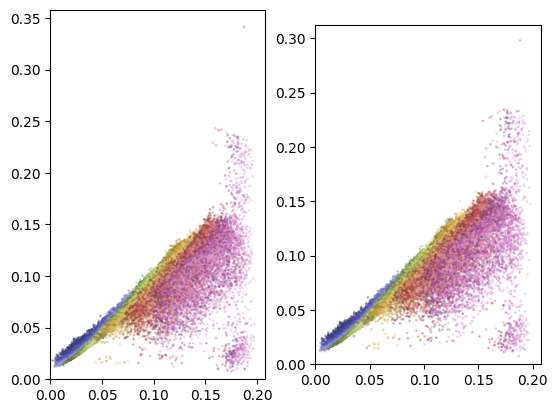

In [326]:
RP_thrs = []
RP_sims = []

RM_thrs = []
RM_sims = []
plt.subplot(121)
for i in range(10):
    RP_thrs.append(DATA['RP'][:,:])
    RP_sims.append(RPs_new[i,:,:])
    plt.scatter(DATA['RP'][:,:],RPs_new[i,:,:],s=1,c=MM,alpha=0.3,cmap='tab20b')
# l = (0.7,1)
# plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
RP_sims = np.array(RP_sims)
RP_thrs = np.array(RP_thrs)
plt.xlim(0,)
plt.ylim(0,)

plt.subplot(122)

for i in range(10):
    RM_thrs.append(DATA['RP'][:,:])
    RM_sims.append(RMs_new[i,:,:])
    plt.scatter(DATA['RP'][:,:],RMs_new[i,:,:],s=1,c=MM,alpha=0.3,cmap='tab20b')
# l = (0.7,1)
# plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
RM_sims = np.array(RM_sims)
RM_thrs = np.array(RM_thrs)
plt.xlim(0,)
plt.ylim(0,)


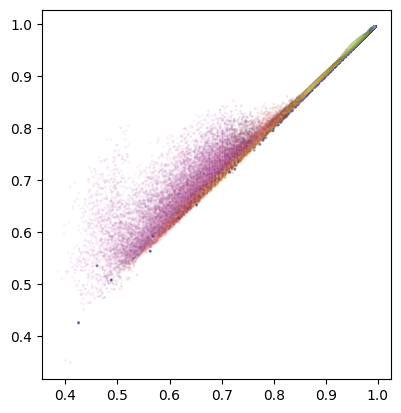

In [299]:
R0_thrs = []
R0_sims = []
for i in range(10):
    R0_thrs.append(DATA['R0'][:,:])
    R0_sims.append(R0s_new[i,:,:])
    plt.scatter(DATA['R0'][:,:],R0s_new[i,:,:],s=1,c=MM,alpha=0.1,cmap='tab20b')
# l = (0.7,1)
# plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
R0_sims = np.array(R0_sims)
R0_thrs = np.array(R0_thrs)
# plt.xlim(0,)
# plt.ylim(0,)


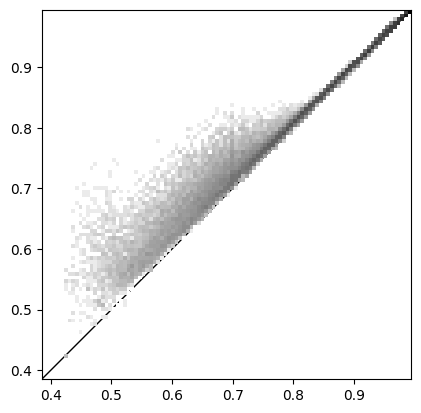

In [317]:
conds = np.isnan(R0_sims.flatten())|np.isnan(R0_thrs.flatten())
plt.hist2d(R0_thrs.flatten()[~conds],R0_sims.flatten()[~conds],bins=100,cmap='gray_r',norm=mcolors.LogNorm());
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim()
plt.ylim(plt.gca().get_xlim())
plt.plot(plt.gca().get_xlim(),plt.gca().get_xlim(),c='k',lw=1,zorder=-10)

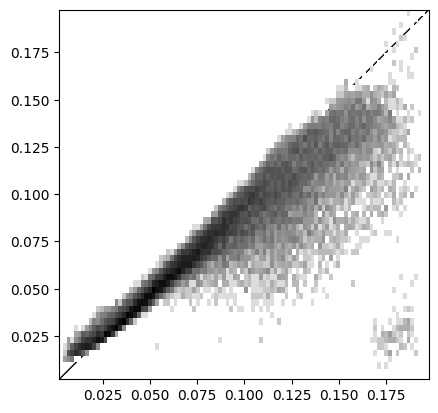

In [324]:
conds = np.isnan(RP_sims.flatten())|np.isnan(RP_thrs.flatten())
plt.hist2d(RP_thrs.flatten()[~conds],RP_sims.flatten()[~conds],bins=100,cmap='gray_r',norm=mcolors.LogNorm());
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim()
plt.ylim(plt.gca().get_xlim())
plt.plot(plt.gca().get_xlim(),plt.gca().get_xlim(),c='k',lw=1,zorder=-10)

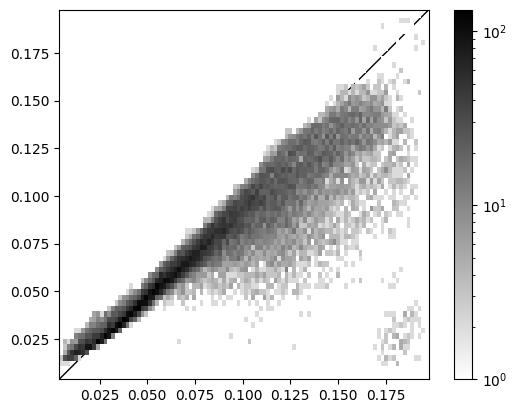

In [325]:
conds = np.isnan(RM_sims.flatten())|np.isnan(RM_thrs.flatten())
plt.hist2d(RM_thrs.flatten()[~conds],RM_sims.flatten()[~conds],bins=100,cmap='gray_r',norm=mcolors.LogNorm());
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim()
plt.ylim(plt.gca().get_xlim())
plt.plot(plt.gca().get_xlim(),plt.gca().get_xlim(),c='k',lw=1,zorder=-10)
plt.colorbar()

In [ ]:
conds = np.isnan(R0_sims.flatten())|np.isnan(R0_thrs.flatten())
plt.hist2d(R0_thrs.flatten()[~conds],R0_sims.flatten()[~conds],bins=100,cmap='inferno_r',norm=mcolors.LogNorm());
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim()
plt.ylim(plt.gca().get_xlim())
plt.plot(plt.gca().get_xlim(),plt.gca().get_xlim(),c='k',lw=1,zorder=-10)

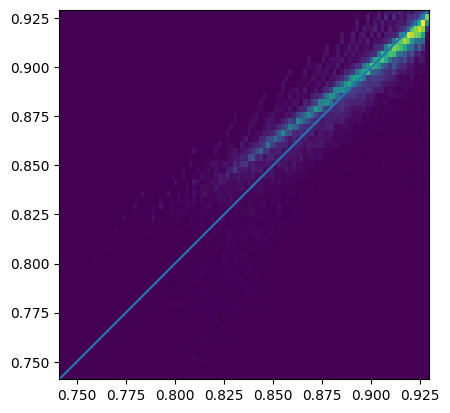

In [262]:
conds = np.isnan(Rsims.flatten())|np.isnan(Rthrs.flatten())
plt.hist2d(Rthrs.flatten()[~conds],Rsims.flatten()[~conds],bins=100);
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim()
plt.ylim(plt.gca().get_xlim())
plt.plot(plt.gca().get_xlim(),plt.gca().get_xlim())

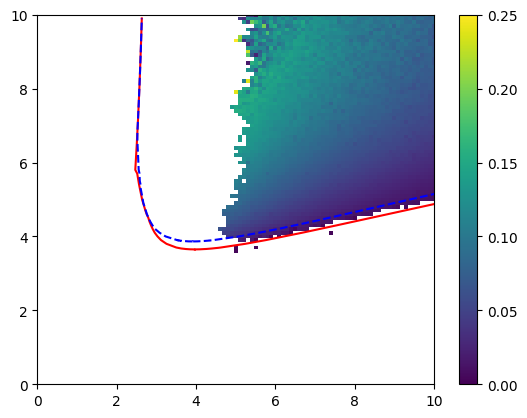

In [452]:
import matplotlib.colors as mcolors
plt.pcolormesh(Ks,ms,M_RPLs,vmin=0,vmax=0.25)
# plt.pcolormesh(Ks_,ms_,N_RMLs.T)
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}=0^+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}=R^{drift}/2$')
plt.plot(K_rpdhu,ms_rpdh,'b--')
# plt.gca().set_aspect('equal')
plt.xlim(0,10)
plt.ylim(0,10)
# plt.ylim(4,5)
# plt.ylim(4,6)
# plt.xlim(8,10)
plt.colorbar()



In [ ]:
from ipywidgets import interactive
import ipywidgets as widgets

def plot_hist(m_idx,K_idx):
    plt.clf()
    plt.hist(np.r_[(RPLs_new - DATA['RPl'])[:,m_idx,K_idx].flatten(),(RMLs_new - DATA['RPl'])[:,m_idx,K_idx].flatten()],bins=10)
    plt.title(f'm = {ms[m_idx]},K = {Ks[K_idx]}')

interactive_plot = interactive(plot_hist, m_idx=widgets.IntSlider(min=38, max=100, step=1, value=50),K_idx=widgets.IntSlider(min=38, max=100, step=1, value=70))
display(interactive_plot)
# plt.hist(np.r_[(RPLs_new - DATA['RPl'])[:,m_idx,:].flatten(),(RMLs_new - DATA['RPl'])[:,m_idx,:].flatten()],bins=100);

interactive(children=(IntSlider(value=50, description='m_idx', min=38), IntSlider(value=70, description='K_idx…